In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df=pd.read_csv('HousingData.csv')

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [24]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [25]:
df.rename(columns={'MEDV': 'Price'}, inplace=True)


In [26]:
cols = [col for col in df.columns if col != 'Price']  # Get all columns except 'Price'
cols.append('Price')  # Add 'Price' at the end
df = df[cols]  # Reorder DataFrame


In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [29]:
## CHhecking for missing values
import seaborn as sns

<Axes: >

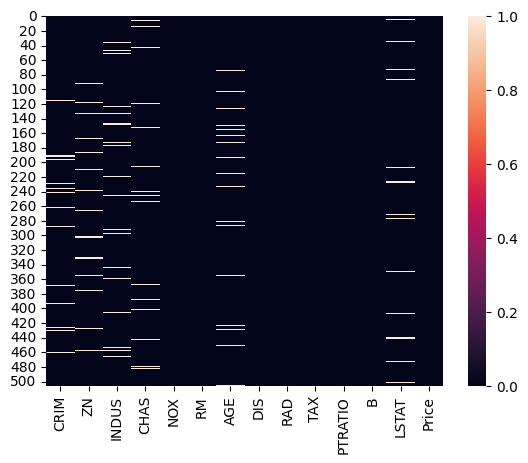

In [30]:
sns.heatmap(df.isnull())

In [31]:
df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [32]:
##So, I'd try to fill up the missing values with the mean of some other columns
df['CRIM'].fillna(df['NOX'].mean(), inplace=True)
df['ZN'].fillna(df['PTRATIO'].mean(), inplace=True)
df['INDUS'].fillna(df['DIS'].mean(), inplace=True)
df['AGE'].fillna(df['PTRATIO'].mean(), inplace=True)
df['LSTAT'].fillna(df['DIS'].mean(), inplace=True)
df['CHAS'].fillna(df['NOX'].mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14220\3496936910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].fillna(df['NOX'].mean(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14220\3496936910.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,3.795043,36.2


<Axes: >

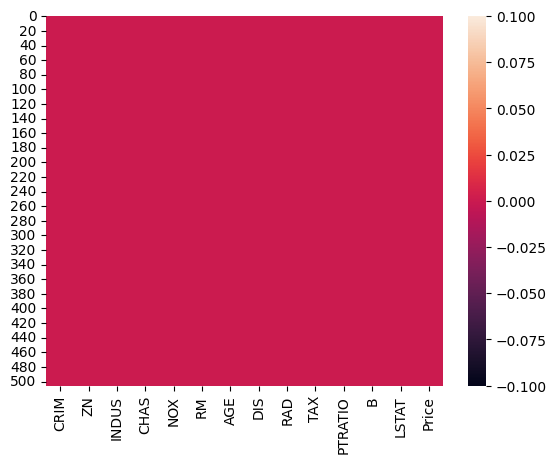

In [34]:
sns.heatmap(df.isnull())

In [35]:
## Now lets perform exploratory data analysis

In [36]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.185136,0.388161,-0.040640,0.411015,-0.219685,0.339925,-0.366157,0.602052,0.561144,0.277621,-0.365855,0.423679,-0.383611
ZN,-0.185136,1.000000,-0.504888,-0.046083,-0.502242,0.317779,-0.503790,0.639171,-0.308892,-0.309406,-0.406624,0.164879,-0.385952,0.366543
INDUS,0.388161,-0.504888,1.000000,0.078880,0.714746,-0.356945,0.537958,-0.682132,0.580495,0.704526,0.380912,-0.349611,0.528287,-0.458662
CHAS,-0.040640,-0.046083,0.078880,1.000000,0.083547,0.065399,0.072966,-0.080739,0.032246,-0.000979,-0.100284,0.042752,-0.029060,0.140823
NOX,0.411015,-0.502242,0.714746,0.083547,1.000000,-0.302188,0.660978,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.562456,-0.427321
RM,-0.219685,0.317779,-0.356945,0.065399,-0.302188,1.000000,-0.235461,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.596986,0.695360
AGE,0.339925,-0.503790,0.537958,0.072966,0.660978,-0.235461,1.000000,-0.675292,0.436062,0.479128,0.250052,-0.231642,0.539298,-0.369598
DIS,-0.366157,0.639171,-0.682132,-0.080739,-0.769230,0.205246,-0.675292,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.470038,0.249929
RAD,0.602052,-0.308892,0.580495,0.032246,0.611441,-0.209847,0.436062,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.452127,-0.381626
TAX,0.561144,-0.309406,0.704526,-0.000979,0.668023,-0.292048,0.479128,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.508745,-0.468536


In [37]:
## Let's try to analyze the correlation by constructing important plots
## we're trying to check for multicollinearity(relationship between 2 independent var)

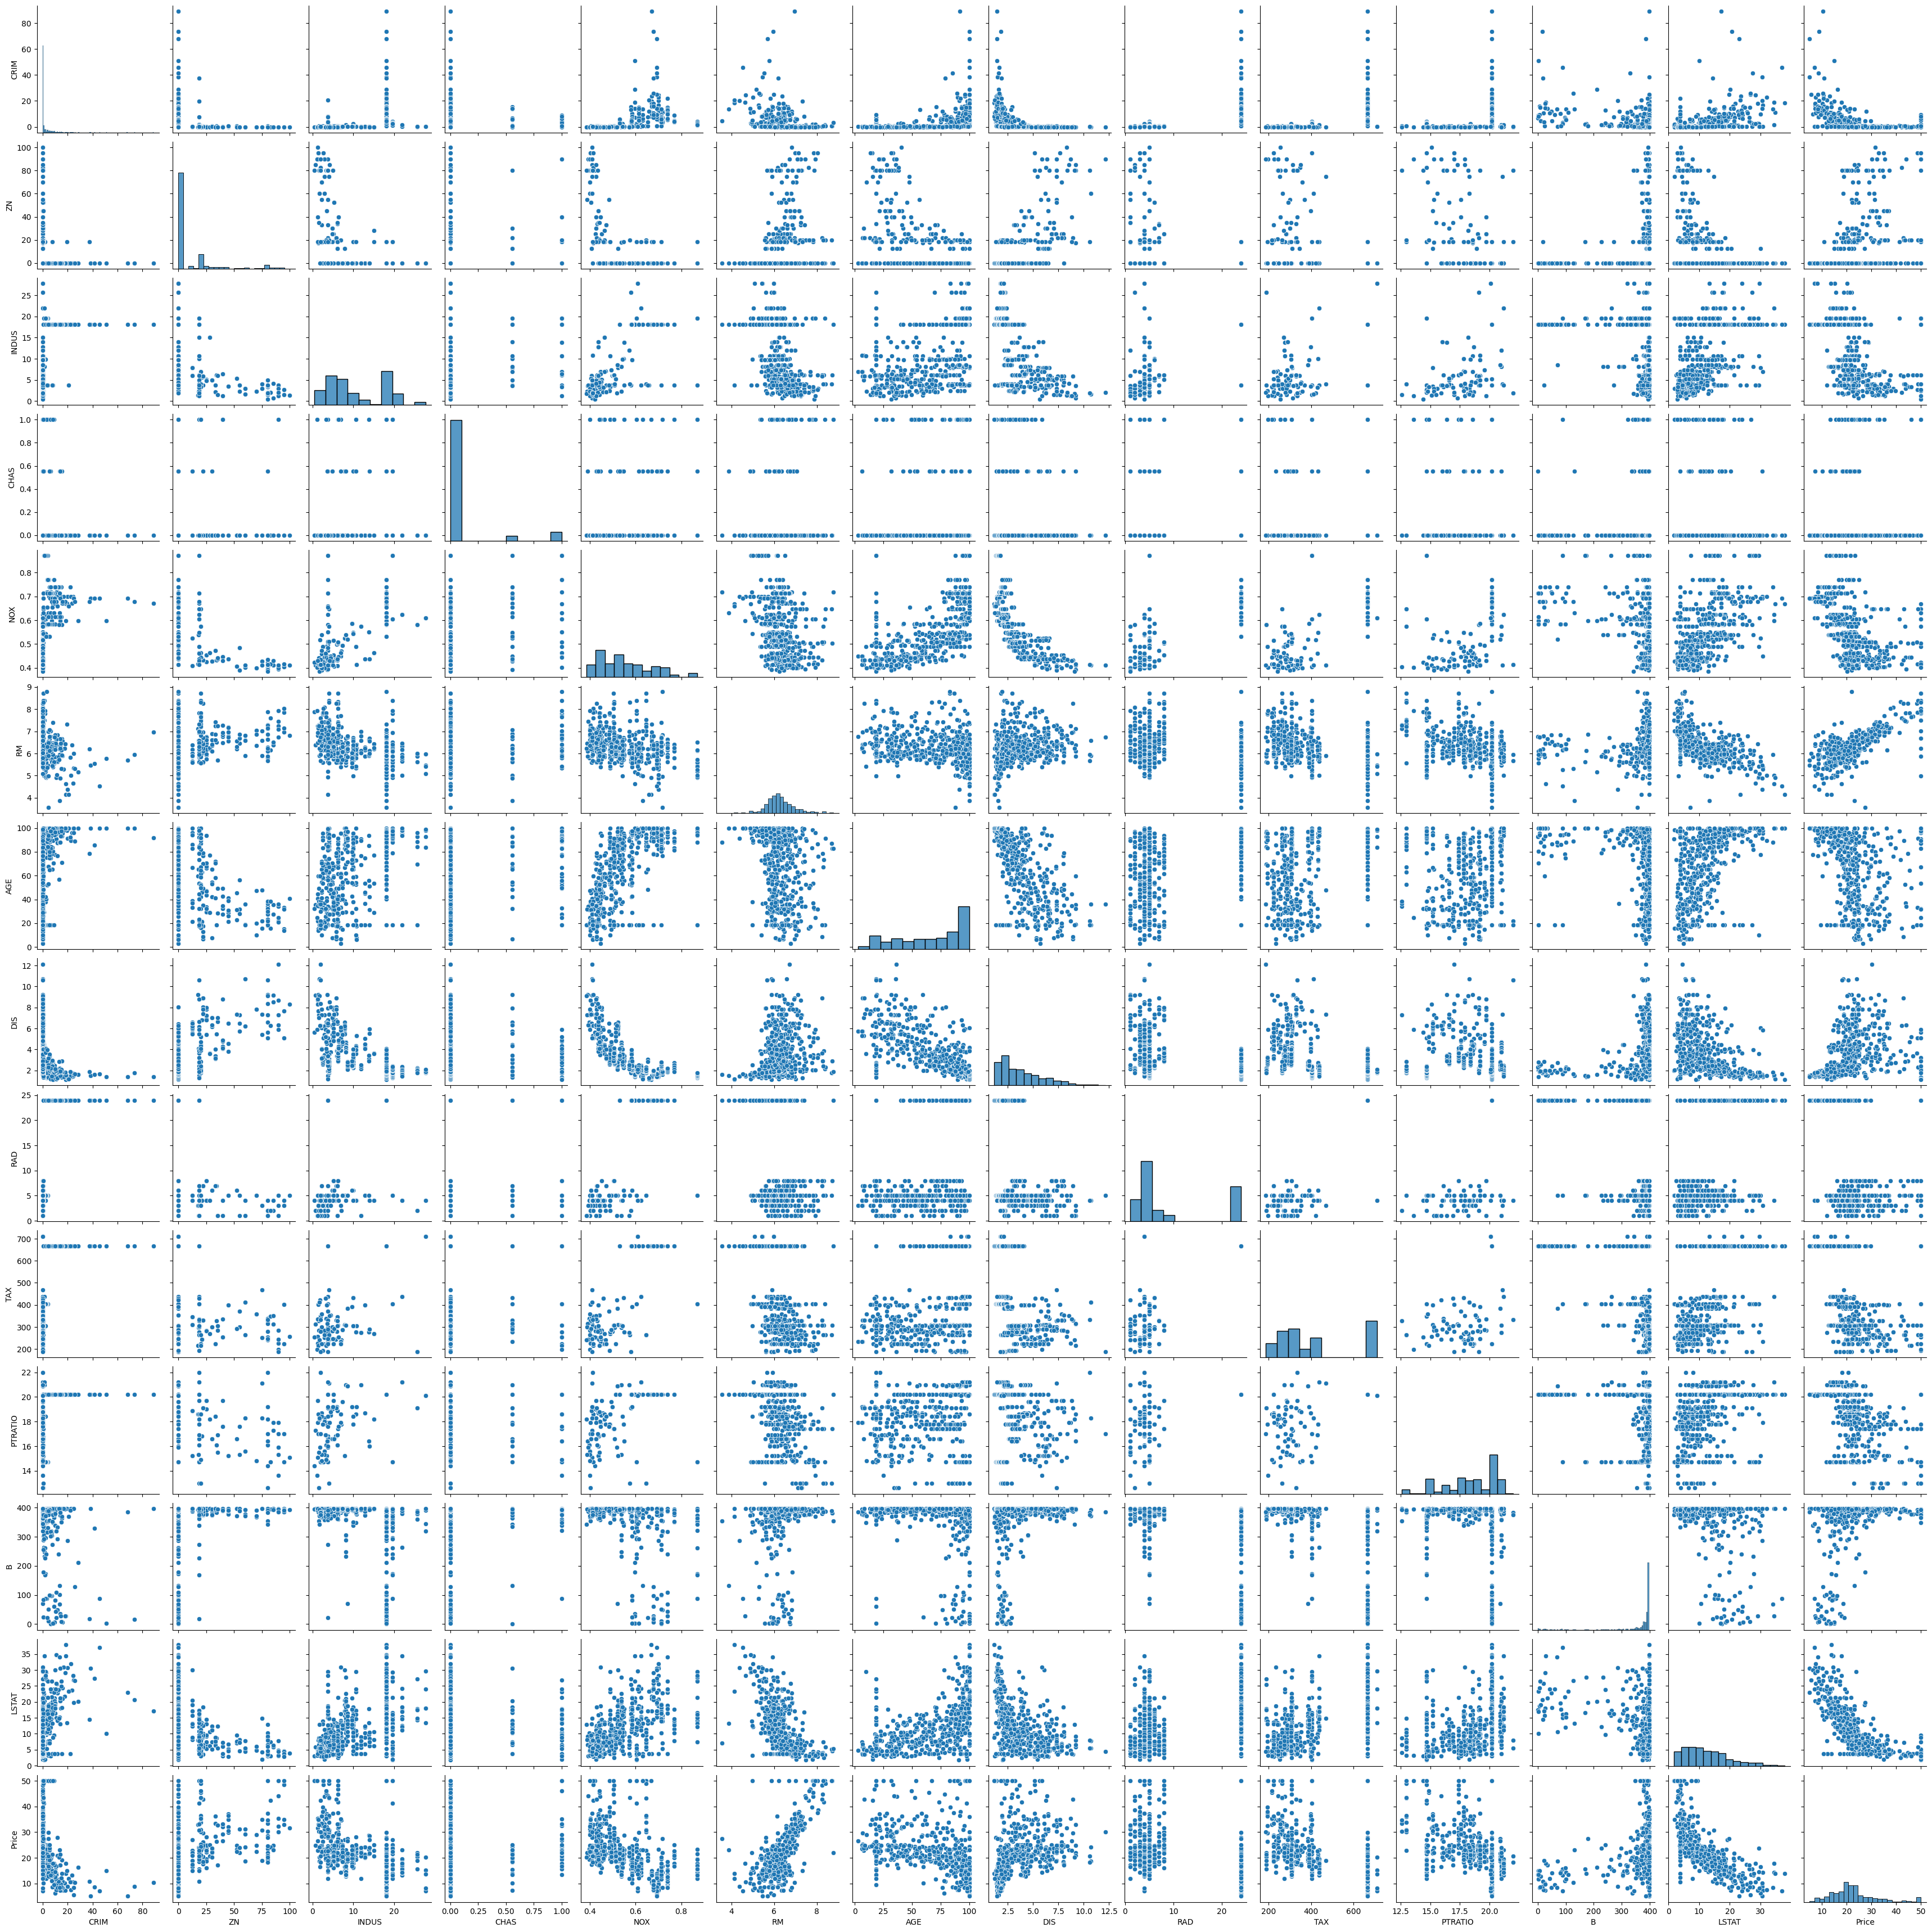

In [38]:
sns.pairplot(df)

In [39]:
#this isnt adviceable as I'm workinh with a large dataset

Text(0, 0.5, 'Price')

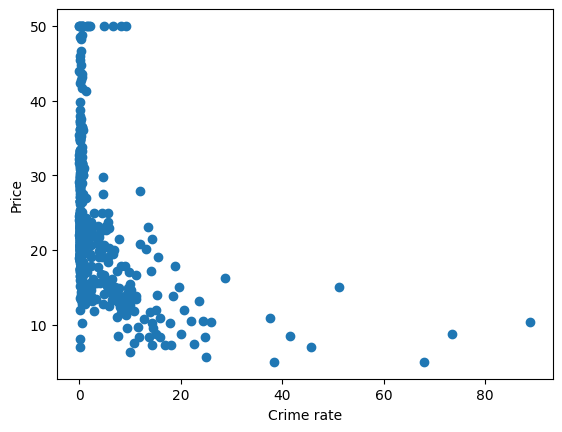

In [40]:
plt.scatter(df['CRIM'], df['Price'])
plt.xlabel('Crime rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

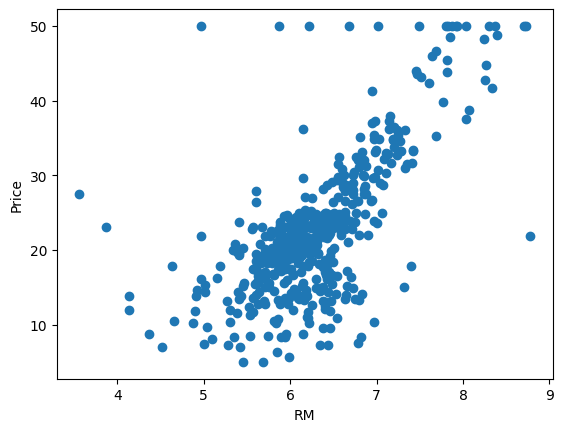

In [41]:
plt.scatter(df['RM'], df['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='Price'>

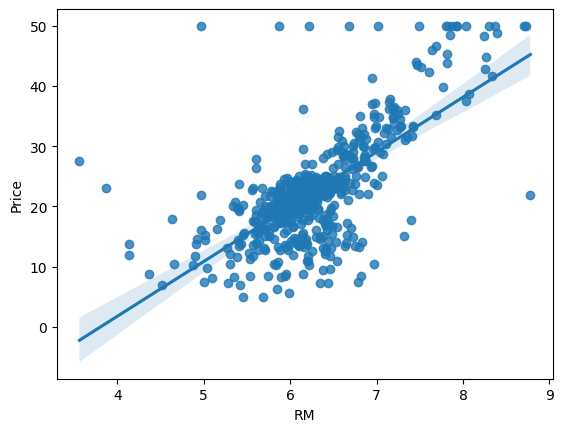

In [42]:
#Lets now plot a regression plot-now I'd use seaborn
sns.regplot(x='RM', y='Price', data=df)
## my graph shows a positive corellation

<Axes: xlabel='LSTAT', ylabel='Price'>

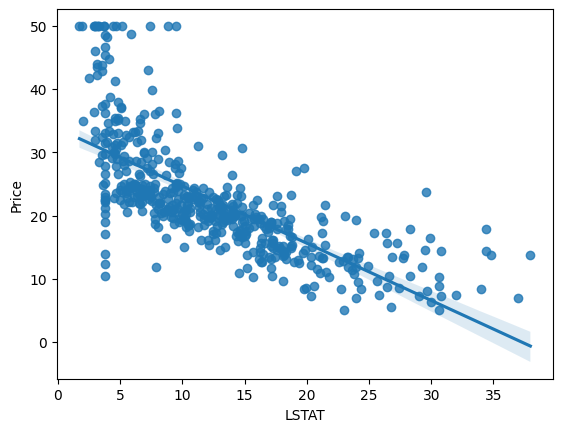

In [43]:
sns.regplot(x='LSTAT', y='Price', data=df)

In [44]:
#This clearly shows me a negative corellation

<Axes: xlabel='CHAS', ylabel='Price'>

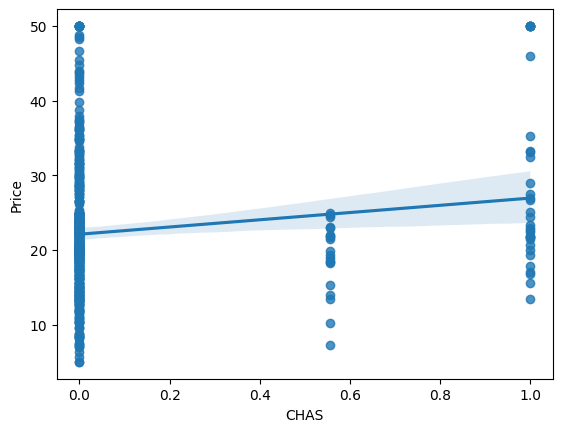

In [45]:
sns.regplot(x='CHAS', y='Price', data=df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

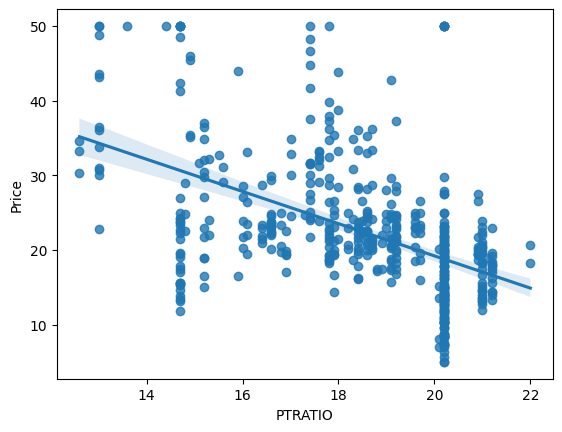

In [46]:
sns.regplot(x='PTRATIO', y='Price', data=df)

In [47]:
#Now let's create our model then define our dependent and independent variable
X=df.iloc[:,:-1]
y=df.Price

In [48]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,3.795043


In [49]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_test


array([[-0.38254326, -0.51455076, -0.98755175, ..., -0.77195078,
         0.42887165, -0.43613578],
       [-0.38654988,  1.22985593, -0.60603549, ..., -0.32270256,
         0.44418004, -1.20705654],
       [-0.38096057, -0.51455076,  2.50596247, ...,  0.80041799,
         0.36993437,  0.82727882],
       ...,
       [ 1.20002559, -0.51455076,  1.09950863, ...,  0.84534281,
        -3.5124912 ,  1.26800485],
       [-0.38706686, -0.51455076, -0.88615908, ...,  0.08162084,
         0.43422959,  0.09833197],
       [-0.3821646 , -0.51455076,  0.33062775, ...,  0.17147048,
         0.29470458, -0.45012709]], shape=(102, 13))

In [52]:
#standardizing the dataset-- this helps make sure that each and every feature contributes to the model by ensuring unifrom unit

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:

X_train = scaler.fit_transform(X_train) 

In [55]:
X_test=scaler.transform(X_test)

In [56]:
X_train

array([[ 1.3103038 , -0.51455076,  1.09950863, ...,  0.84534281,
        -0.07433689,  1.7842839 ],
       [-0.32181939, -0.51455076, -0.35363247, ...,  1.20474139,
         0.4301838 , -0.51588621],
       [-0.38901915,  0.29029815, -0.65709969, ..., -0.63717631,
         0.06529747, -0.60543054],
       ...,
       [-0.39124693,  2.97426263, -1.24798538, ..., -0.59225149,
         0.37901005, -0.86287051],
       [ 0.87234273, -0.51455076,  1.09950863, ...,  0.84534281,
        -2.69458597,  1.55482654],
       [-0.36701339, -0.51455076, -0.29235544, ...,  1.15981657,
        -3.12158061, -0.21367408]], shape=(404, 13))

In [57]:
X_test

array([[-0.38254326, -0.51455076, -0.98755175, ..., -0.77195078,
         0.42887165, -0.43613578],
       [-0.38654988,  1.22985593, -0.60603549, ..., -0.32270256,
         0.44418004, -1.20705654],
       [-0.38096057, -0.51455076,  2.50596247, ...,  0.80041799,
         0.36993437,  0.82727882],
       ...,
       [ 1.20002559, -0.51455076,  1.09950863, ...,  0.84534281,
        -3.5124912 ,  1.26800485],
       [-0.38706686, -0.51455076, -0.88615908, ...,  0.08162084,
         0.43422959,  0.09833197],
       [-0.3821646 , -0.51455076,  0.33062775, ...,  0.17147048,
         0.29470458, -0.45012709]], shape=(102, 13))

In [58]:
#Model Training
from sklearn.linear_model import LinearRegression

In [59]:
regression_model=LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [60]:
#prediction with test data
y_pred=regression_model.predict(X_test)
y_pred

array([30.26621354, 35.56876935, 14.19788405, 24.77135554, 18.2025249 ,
       22.73530887, 19.23163586, 14.70406509, 21.69755176, 20.66712328,
       24.26686015, 19.76089025, -5.63236091, 21.49176298, 18.70887296,
       28.79520253, 19.67017883,  7.24860735, 41.04450732, 16.96835753,
       28.5613593 , 30.21401753, 11.72755024, 26.45366883, 17.00130301,
       14.7589781 , 24.51372251, 14.27264888, 22.43653289, 19.21265586,
       22.3682974 , 24.9082324 , 25.90574337, 16.03338241, 16.2833094 ,
       16.4798256 , 30.78179526, 19.98942942, 23.45575052, 26.20148657,
       14.48237287, 32.23653616, 43.18156018, 17.3967922 , 27.3950392 ,
       16.09966647, 14.04689215, 25.93671832, 19.47506114, 29.84905468,
       20.75144111, 34.72478797, 16.28427117, 26.0397819 , 39.70749758,
       21.65912224, 19.4652386 , 32.72152835, 25.2006326 , 14.14774251,
       22.54850111, 30.69144283, 31.50693622, 16.03880704, 19.90385442,
       16.33221734, 19.93373089, 25.9364099 , 30.84690813, 11.11

In [61]:
print(regression_model.coef_)

[-1.03241174  0.72612109 -0.16881896  0.6611593  -1.88641612  3.44899577
 -0.65302943 -3.31256368  1.93057087 -1.61864923 -2.01968749  1.12981905
 -2.89936152]


In [62]:
print(regression_model.intercept_)

22.796534653465343


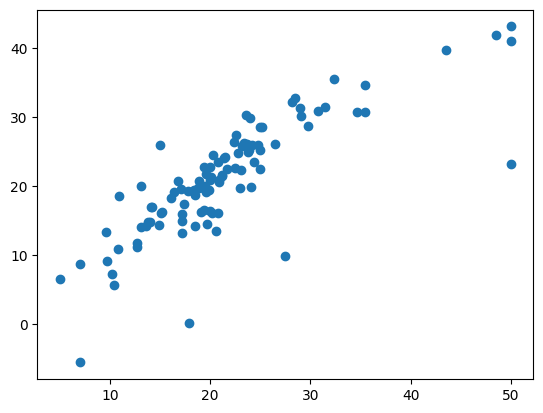

In [63]:
#let's plot a scattered plot for the regression to check how accurate our model is 
plt.scatter(y_test, y_pred)

In [64]:
#I can also use model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE=mean_absolute_error(y_test, y_pred)

In [65]:
MAE

3.1730412376597186

In [66]:
MSE=mean_squared_error(y_test, y_pred)
MSE

25.360441488463444

In [67]:
#to evaluate root mean square error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.035915158981875


In [68]:
# Mean abosolute error is a metrics that is use to measure how far the model predictions are from the actual value
#a lower MAE is better

In [69]:
error=y_test-y_pred

In [70]:
error

173    -6.666214
274    -3.168769
491    -0.597884
72     -1.971356
452    -2.102525
         ...    
412    17.822368
436    -3.676270
411     1.236153
86     -0.168027
75     -2.682585
Name: Price, Length: 102, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14220\1567266927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Price', ylabel='Density'>

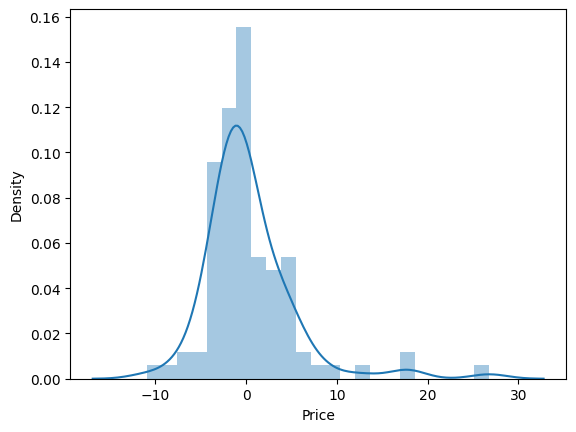

In [71]:
sns.distplot(error)

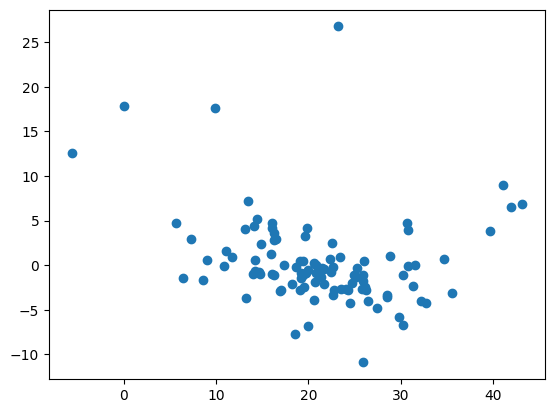

In [72]:
#scatter plot with respect to predictions and error
plt.scatter(y_pred, error)

## New data Prediction

In [73]:
# Extract and reshape the first row, ensuring 'Price' is dropped
first_row = df.drop(columns=['Price']).iloc[0].values.reshape(1, -1)  

# Transform the first row using the same scaler that was used during training
first_row_scaled = scaler.transform(first_row)

# Make the prediction
prediction = regression_model.predict(first_row_scaled)

# Print the predicted value
print(prediction)


[29.84905468]


c:\End-to-end_MLProject\boustonhousepricing\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [74]:
import pickle

In [83]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [84]:
pickle.dump(regression_model, open('regmodel.pkl','wb'))

In [85]:
pickled_model=pickle.load(open('regmodel.pkl', 'rb'))

In [86]:
prediction = np.array(prediction).reshape(1, -1)
print(prediction)# Ensures correct shape


[[29.84905468]]


In [87]:
test_row = df.drop(columns=['Price']).iloc[0].values.reshape(1, -1)  # Extract first row properly
print(test_row.shape)  # Should be (1, 13)


(1, 13)


In [88]:
result = pickled_model.predict(test_row)
print(result)
 

[-73.09788757]
